In [1]:
import pandas as pd
import numpy as np

# 🔹 Load dataset
file_path = 'environment_monitoring.sensors_datas.csv'  # ✅ Use your actual path
df = pd.read_csv(file_path)

# 🔹 Display basic info
print("✅ Dataset Loaded Successfully!")
print(df.head())
print("\n🔎 Dataset Info:")
print(df.info())

# 🔹 Parse 'timestamp' into datetime
df['local_timestamp'] = pd.to_datetime(df['local_timestamp'], errors='coerce')

# 🔹 Drop rows with null timestamps
df = df.dropna(subset=['local_timestamp'])

# 🔹 Drop unwanted columns (keep only useful ones)
columns_to_keep = ['local_timestamp', 'temperature', 'humidity', 'air_quality', 'noise_level']
df = df[columns_to_keep]

# 🔹 Drop any other rows with NaN in selected columns
df = df.dropna()

# 🔹 Sort by timestamp
df = df.sort_values(by='local_timestamp')

# 🔹 Reset index and set timestamp as new index
df = df.set_index('local_timestamp')

# ✅ Final check
print("\n✅ Final Processed Dataset:")
print(df.head())
print(f"Shape: {df.shape}")


✅ Dataset Loaded Successfully!
                        _id  temperature  humidity  air_quality  noise_level  \
0  680cb11a2a8a477d1c78c751         33.1      73.8           89            3   
1  680cb1572a8a477d1c78c752         33.2      73.7          101            2   
2  680cb1952a8a477d1c78c753         33.2      73.7           65           28   
3  680cb1d22a8a477d1c78c754         33.2      73.7           94            3   
4  680cb2102a8a477d1c78c755         33.2      73.9           95            9   

                  timestamp        zone           local_timestamp  
0  2025-04-26T10:10:34.078Z  playground                       NaN  
1  2025-04-26T10:11:35.697Z  playground                       NaN  
2  2025-04-26T10:12:37.143Z  playground                       NaN  
3  2025-04-26T10:13:38.812Z  playground                       NaN  
4  2025-04-26T10:14:40.468Z  playground  2025-04-26T15:44:40.468Z  

🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries

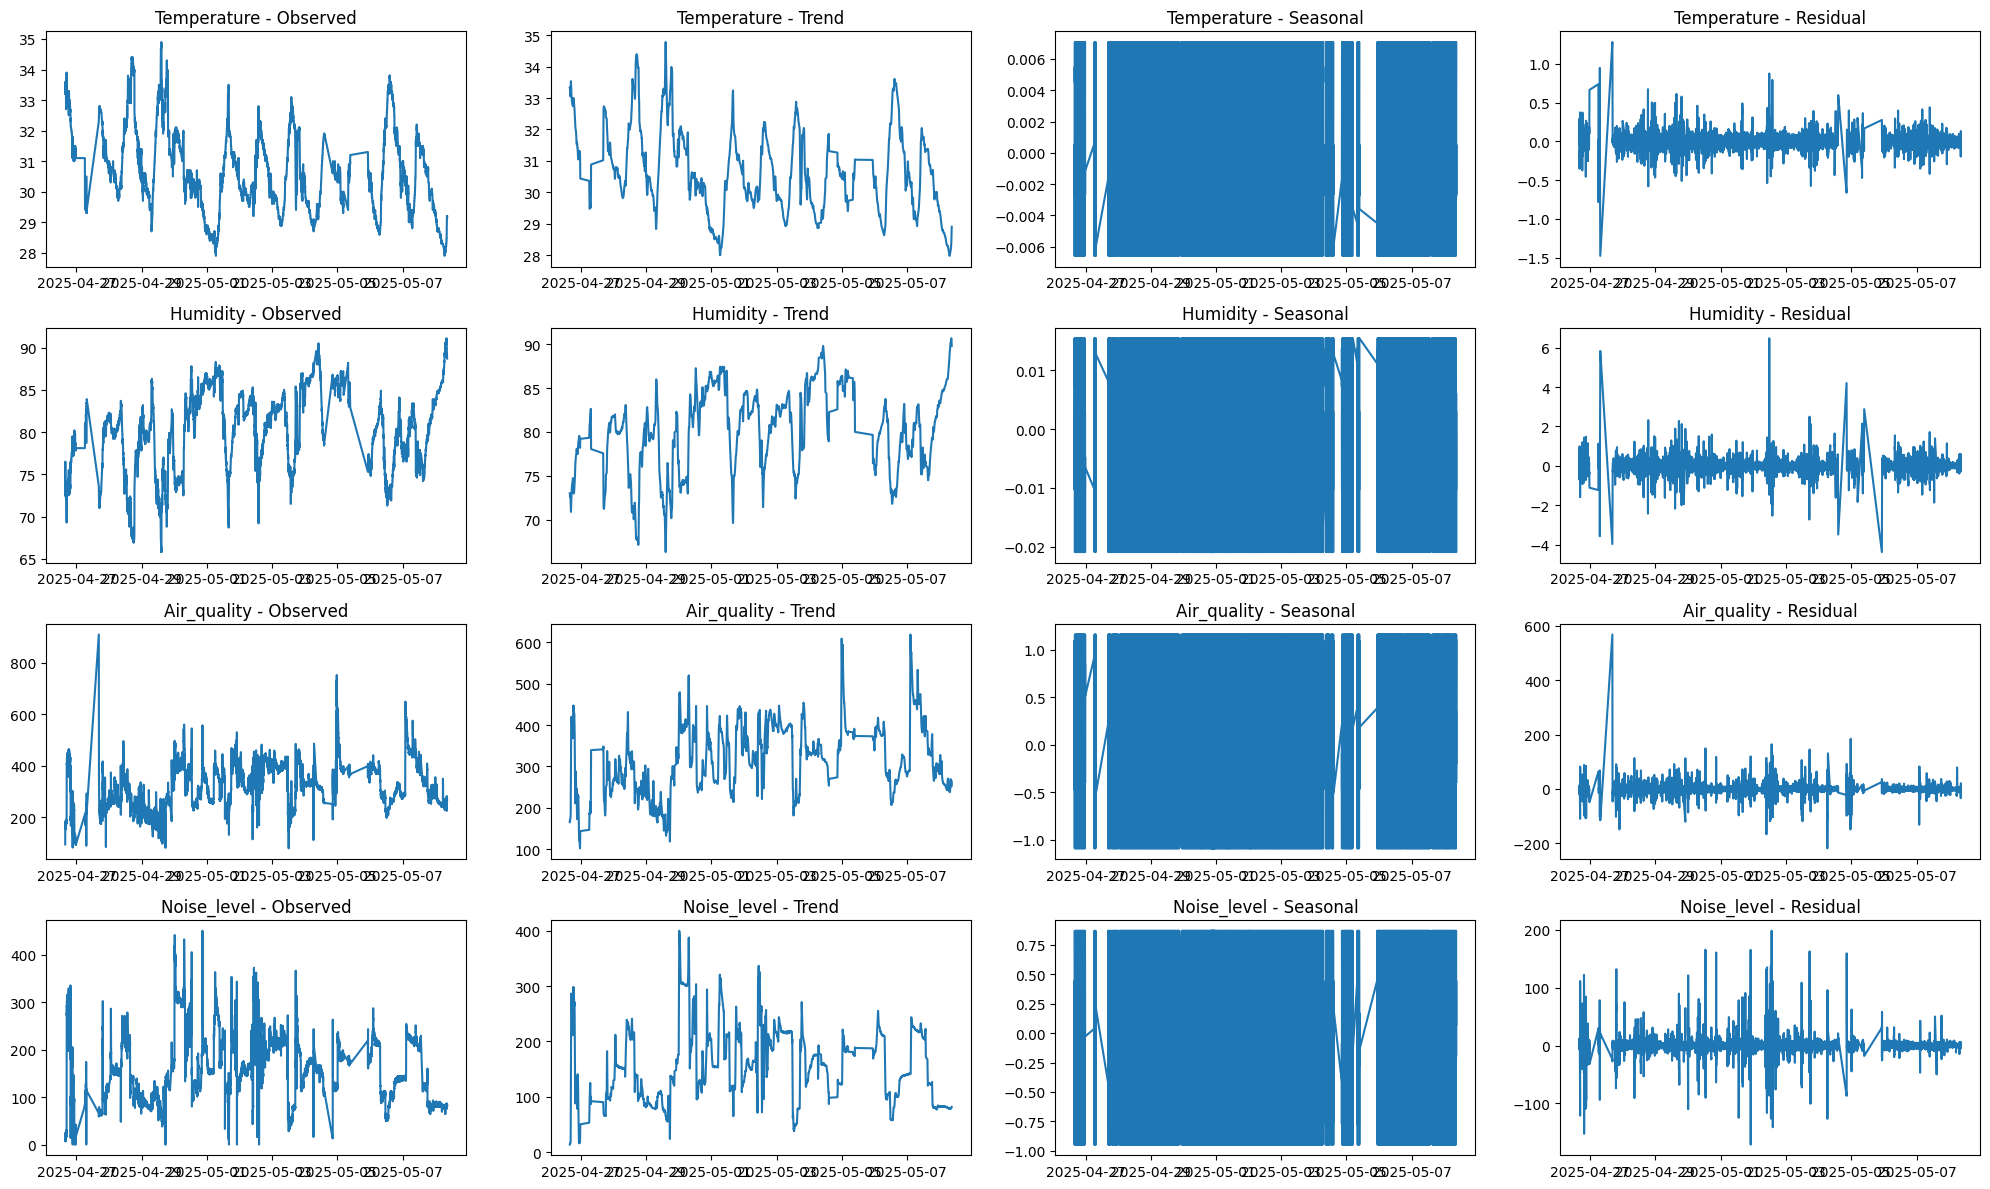

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

numeric_cols = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Set up figure with 4 rows (one per variable)
fig, axes = plt.subplots(len(numeric_cols), 4, figsize=(20, 12))

for i, col in enumerate(numeric_cols):
    result = seasonal_decompose(df[col], model='additive', period=24)
    
    # Plot observed, trend, seasonal, residual
    axes[i, 0].plot(result.observed)
    axes[i, 0].set_title(f'{col.capitalize()} - Observed')

    axes[i, 1].plot(result.trend)
    axes[i, 1].set_title(f'{col.capitalize()} - Trend')

    axes[i, 2].plot(result.seasonal)
    axes[i, 2].set_title(f'{col.capitalize()} - Seasonal')

    axes[i, 3].plot(result.resid)
    axes[i, 3].set_title(f'{col.capitalize()} - Residual')

# Adjust layout
plt.tight_layout()
plt.show()


 Seasonal-Trend Decomposition

Rolling Statistics

 Autocorrelation and Partial Autocorrelation

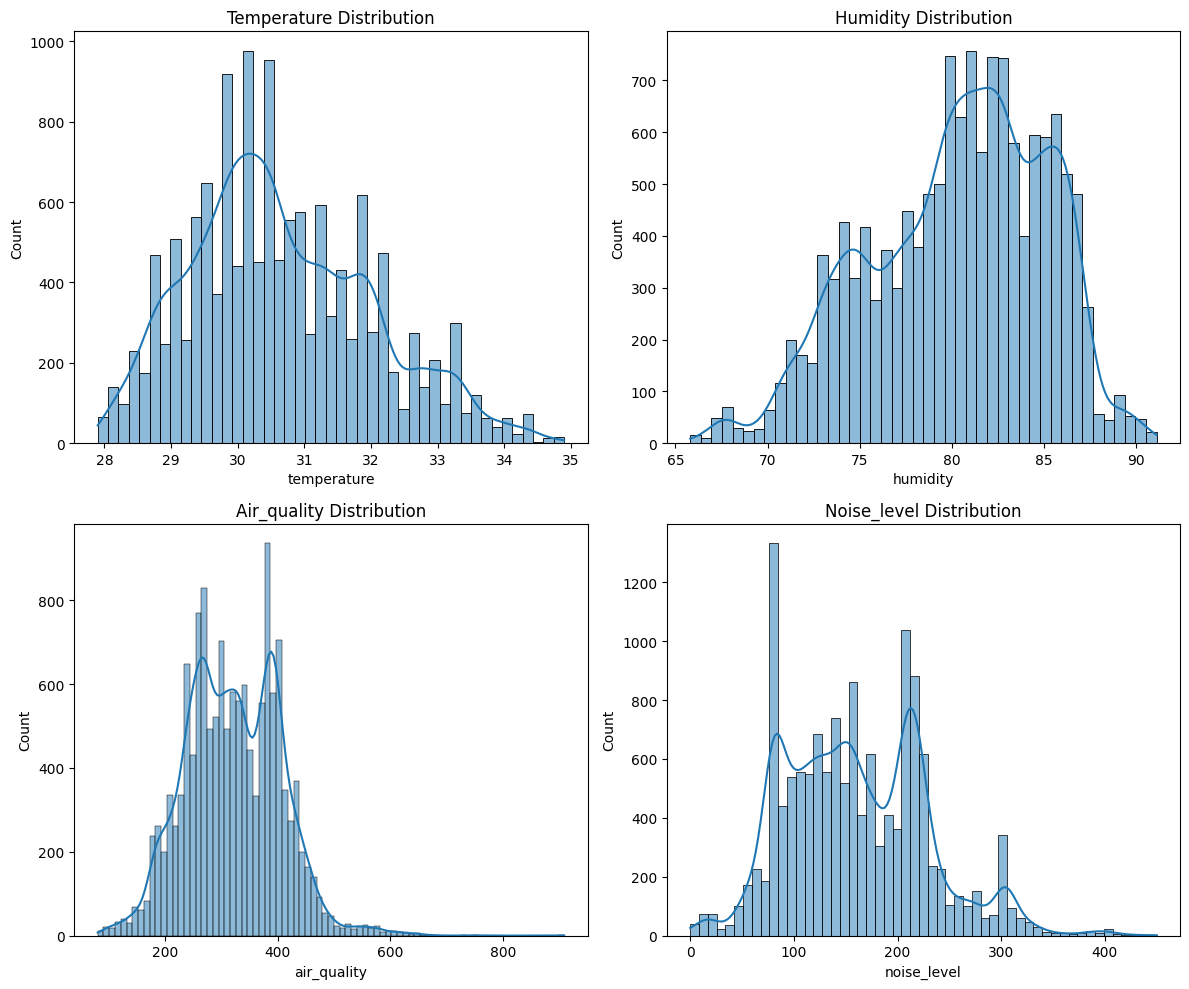

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Histograms with KDE in one figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, 2)
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col.capitalize()} Distribution')

plt.tight_layout()
plt.show()


In [4]:
zone_summary = df.groupby(df.index.floor('D')).agg({
    'temperature': ['mean', 'std', 'min', 'max'],
    'humidity': ['mean', 'std', 'min', 'max'],
    'air_quality': ['mean', 'std', 'min', 'max'],
    'noise_level': ['mean', 'std', 'min', 'max']
})

print(zone_summary)


                          temperature                         humidity  \
                                 mean       std   min   max       mean   
local_timestamp                                                          
2025-04-26 00:00:00+00:00   32.246943  0.820152  31.0  33.9  75.596725   
2025-04-27 00:00:00+00:00   31.324217  1.030983  29.3  32.8  78.699165   
2025-04-28 00:00:00+00:00   31.615453  1.342852  29.7  34.4  76.746873   
2025-04-29 00:00:00+00:00   31.481770  1.528491  28.7  34.9  76.920290   
2025-04-30 00:00:00+00:00   30.299034  0.943673  28.6  32.1  81.472601   
2025-05-01 00:00:00+00:00   30.078775  1.409973  27.9  33.5  82.464579   
2025-05-02 00:00:00+00:00   30.538308  0.791888  29.2  32.8  80.952889   
2025-05-03 00:00:00+00:00   30.577960  1.190322  28.9  33.1  80.953352   
2025-05-04 00:00:00+00:00   29.914773  0.834664  28.7  31.9  85.912273   
2025-05-05 00:00:00+00:00   30.257734  0.444127  29.3  31.3  83.772549   
2025-05-06 00:00:00+00:00   31.020489 

In [5]:
df.index = pd.to_datetime(df.index)


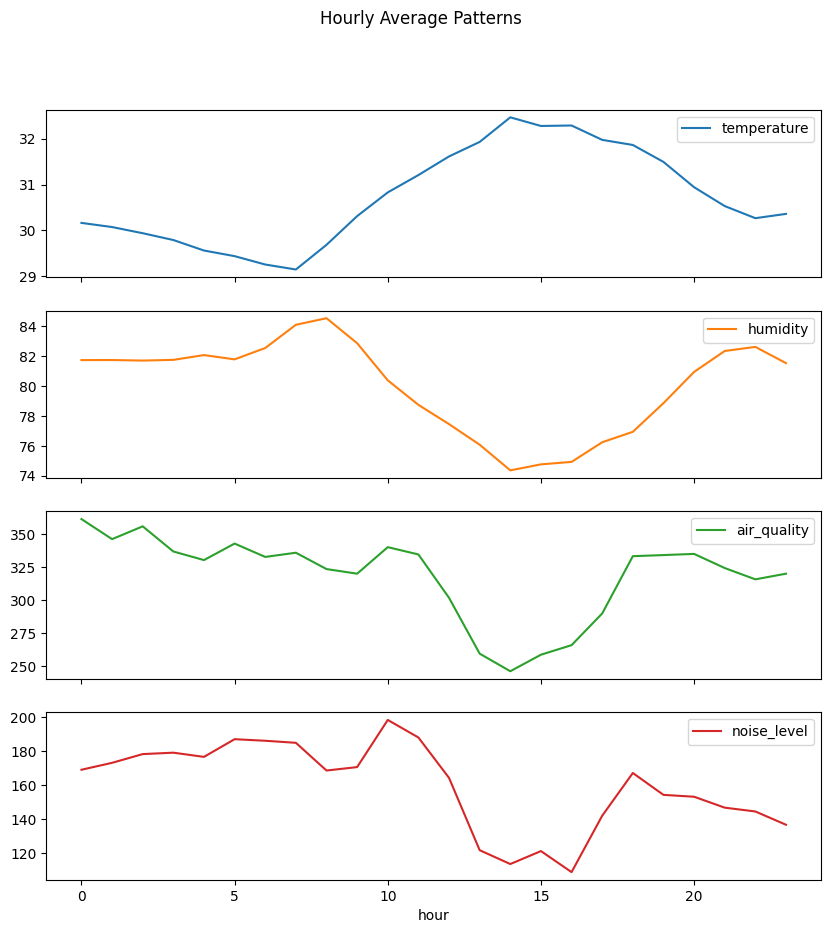

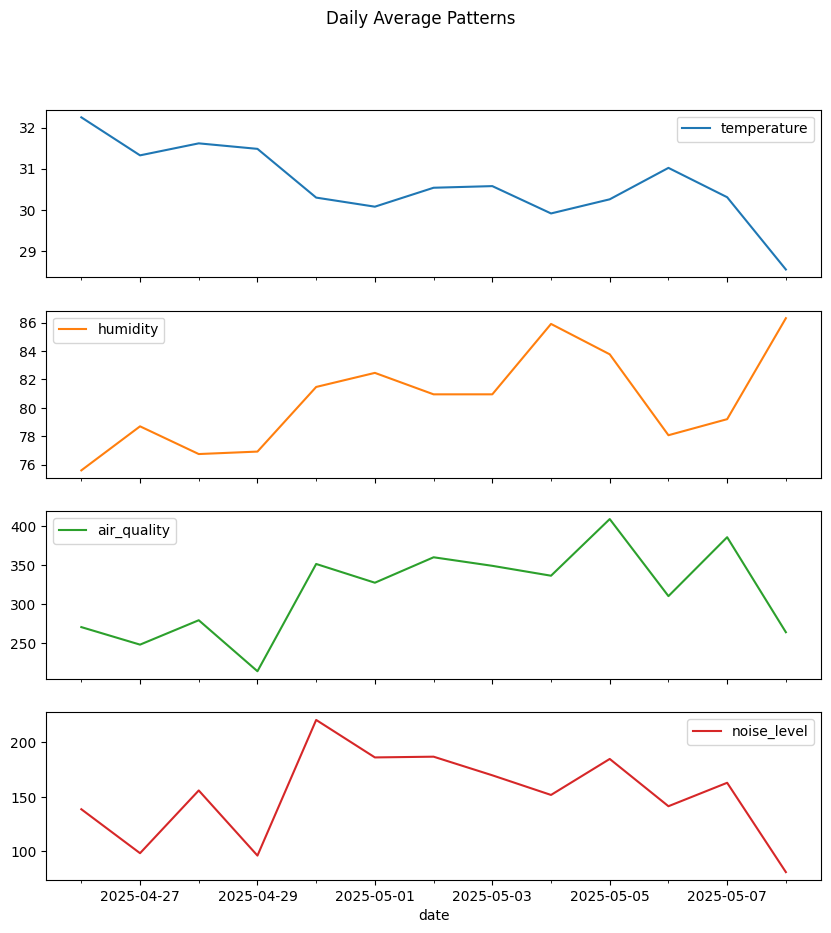

In [6]:
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Add hour and date columns
df['hour'] = df.index.hour
df['date'] = df.index.date

# Define numeric columns
numeric_cols = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Average by hour of day
hourly_avg = df.groupby('hour')[numeric_cols].mean()

# Plot all four
hourly_avg.plot(subplots=True, figsize=(10, 10), title='Hourly Average Patterns')
plt.show()

# Average by day
daily_avg = df.groupby('date')[numeric_cols].mean()

# Plot all four
daily_avg.plot(subplots=True, figsize=(10, 10), title='Daily Average Patterns')
plt.show()


Extreme Value Analysis (Top/Bottom 1%)

In [7]:
# Define top/bottom 1% thresholds
for col in ['temperature', 'humidity', 'air_quality', 'noise_level']:
    top_1 = df[col].quantile(0.99)
    bottom_1 = df[col].quantile(0.01)
    print(f"\n{col} - Top 1% > {top_1:.2f}, Bottom 1% < {bottom_1:.2f}")

    extreme_high = df[df[col] > top_1]
    extreme_low = df[df[col] < bottom_1]

    print(f"Top 1% count: {len(extreme_high)}, Bottom 1% count: {len(extreme_low)}")



temperature - Top 1% > 34.00, Bottom 1% < 28.20
Top 1% count: 135, Bottom 1% count: 134

humidity - Top 1% > 89.30, Bottom 1% < 68.00
Top 1% count: 121, Bottom 1% count: 136

air_quality - Top 1% > 545.00, Bottom 1% < 137.00
Top 1% count: 137, Bottom 1% count: 138

noise_level - Top 1% > 330.09, Bottom 1% < 18.00
Top 1% count: 141, Bottom 1% count: 137


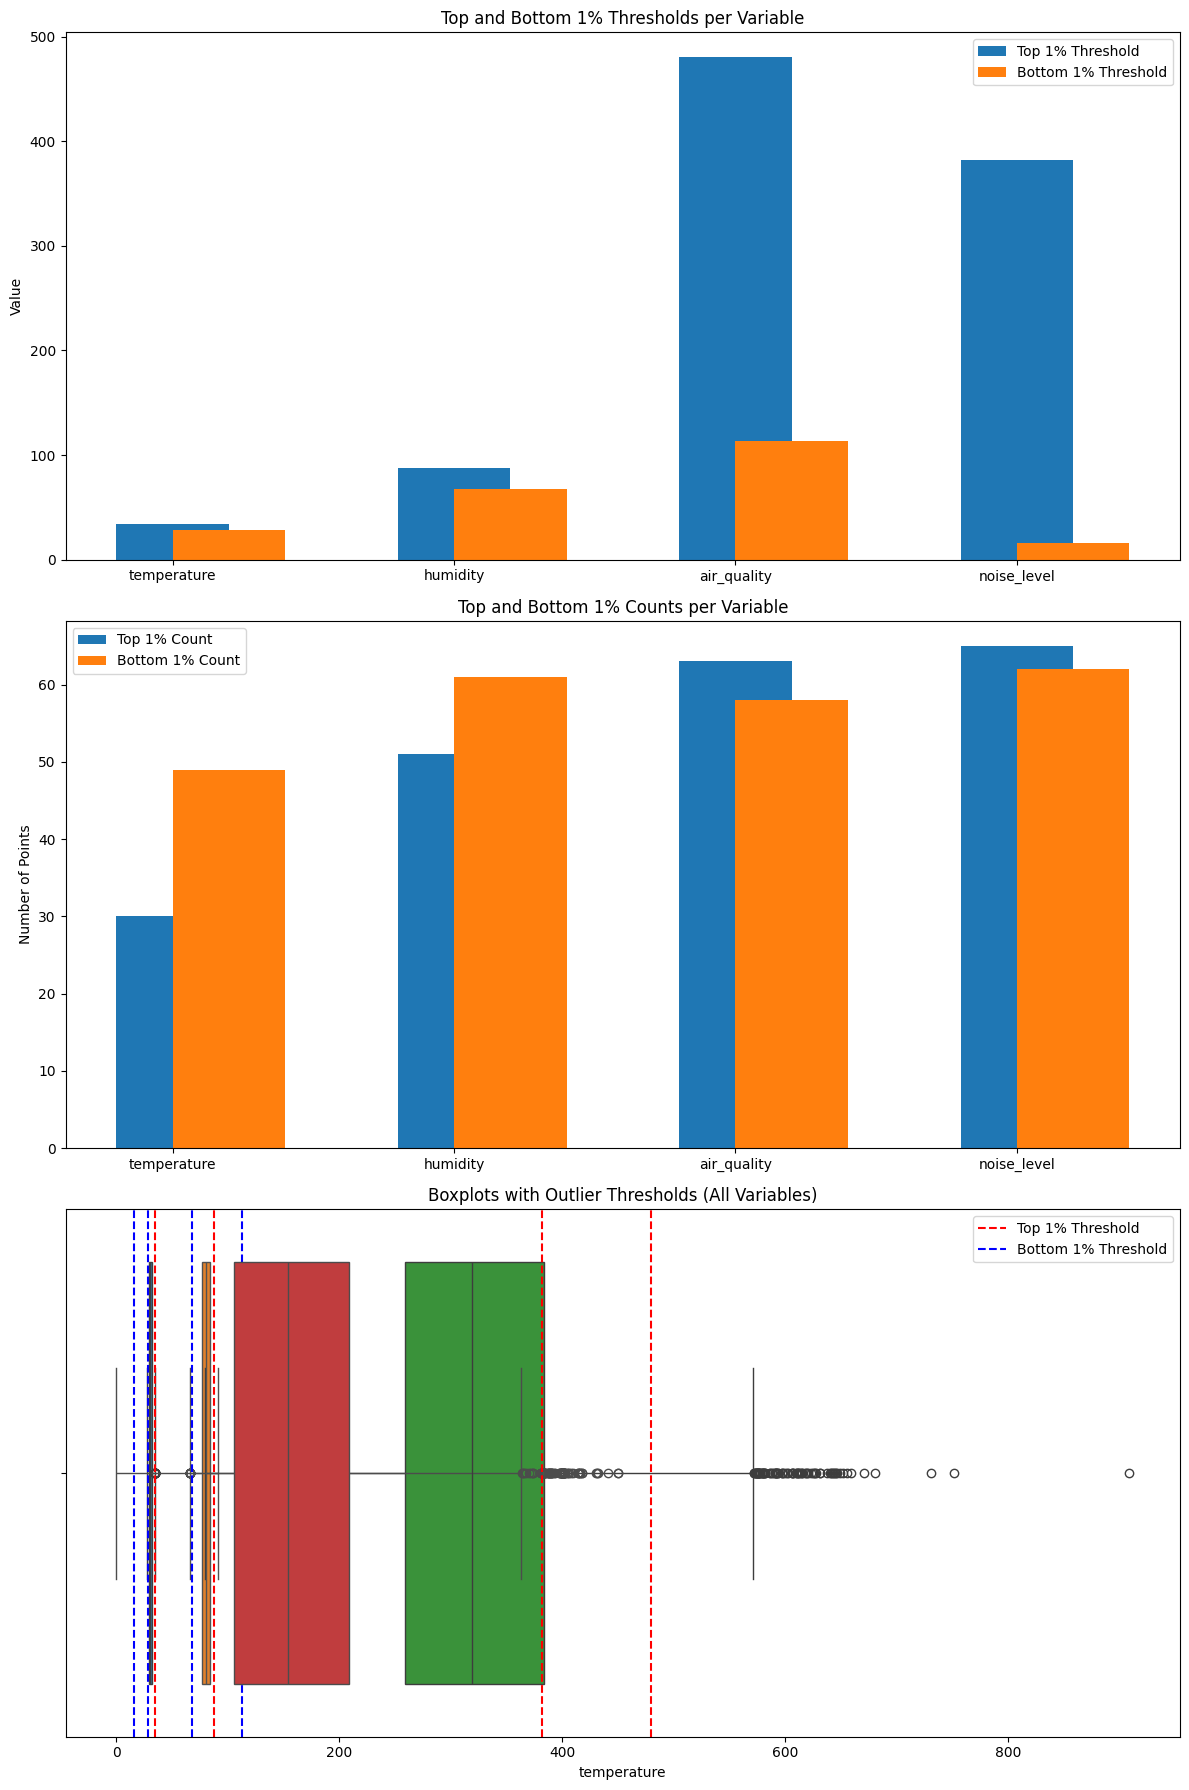

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Threshold values
top_thresholds = {'temperature': 34.40, 'humidity': 87.40, 'air_quality': 480.00, 'noise_level': 381.77}
bottom_thresholds = {'temperature': 28.20, 'humidity': 67.50, 'air_quality': 113.00, 'noise_level': 16.00}

# Count values
top_counts = {'temperature': 30, 'humidity': 51, 'air_quality': 63, 'noise_level': 65}
bottom_counts = {'temperature': 49, 'humidity': 61, 'air_quality': 58, 'noise_level': 62}

variables = list(top_thresholds.keys())
top_values = list(top_thresholds.values())
bottom_values = list(bottom_thresholds.values())
top_c = list(top_counts.values())
bottom_c = list(bottom_counts.values())

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# --- 1️⃣ Bar Chart: Top/Bottom Thresholds ---
axes[0].bar(variables, top_values, width=0.4, label='Top 1% Threshold', align='center')
axes[0].bar(variables, bottom_values, width=0.4, label='Bottom 1% Threshold', align='edge')
axes[0].set_ylabel('Value')
axes[0].set_title('Top and Bottom 1% Thresholds per Variable')
axes[0].legend()

# --- 2️⃣ Bar Chart: Top/Bottom Counts ---
axes[1].bar(variables, top_c, width=0.4, label='Top 1% Count', align='center')
axes[1].bar(variables, bottom_c, width=0.4, label='Bottom 1% Count', align='edge')
axes[1].set_ylabel('Number of Points')
axes[1].set_title('Top and Bottom 1% Counts per Variable')
axes[1].legend()

# --- 3️⃣ Boxplots with Highlighted Thresholds ---
for i, col in enumerate(variables):
    sns.boxplot(x=df[col], ax=axes[2])
    axes[2].axvline(top_thresholds[col], color='red', linestyle='--', label='Top 1% Threshold' if i == 0 else "")
    axes[2].axvline(bottom_thresholds[col], color='blue', linestyle='--', label='Bottom 1% Threshold' if i == 0 else "")

axes[2].set_title('Boxplots with Outlier Thresholds (All Variables)')
axes[2].legend()

plt.tight_layout()
plt.show()


Multivariate Time Series Patterns (Cross-plots)

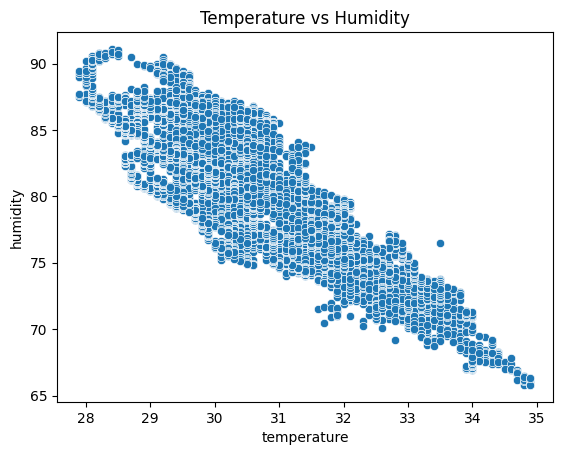

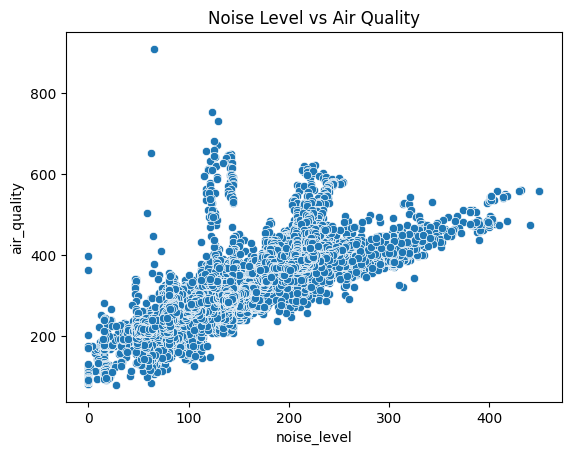

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: temperature vs humidity
sns.scatterplot(x=df['temperature'], y=df['humidity'])
plt.title('Temperature vs Humidity')
plt.show()

# Scatter plot: noise vs air_quality
sns.scatterplot(x=df['noise_level'], y=df['air_quality'])
plt.title('Noise Level vs Air Quality')
plt.show()


Clustering Time Periods (Using KMeans)

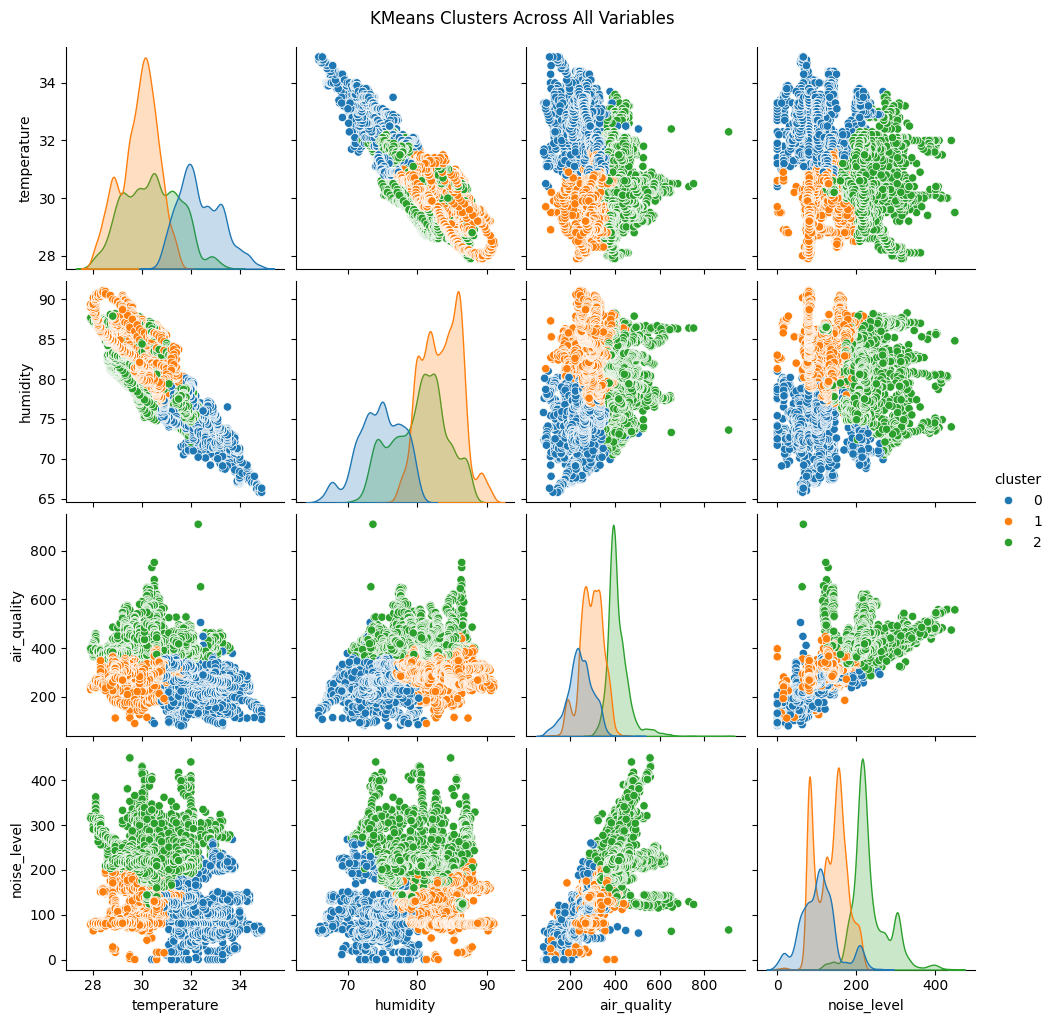

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features
features = df[['temperature', 'humidity', 'air_quality', 'noise_level']]
scaled = StandardScaler().fit_transform(features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled)

# Pair plot: all pairwise scatter plots colored by cluster
sns.pairplot(df, vars=['temperature', 'humidity', 'air_quality', 'noise_level'], hue='cluster', palette='tab10')
plt.suptitle('KMeans Clusters Across All Variables', y=1.02)
plt.show()


Fourier Transform / Spectral Analysis

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests

# Define variable pairs to test
variable_pairs = [
    ('temperature', 'humidity'),
    ('temperature', 'air_quality'),
    ('temperature', 'noise_level'),
    ('humidity', 'air_quality'),
    ('humidity', 'noise_level'),
    ('air_quality', 'noise_level'),
]

# Run Granger causality tests for each pair
for target, predictor in variable_pairs:
    print(f"\n🔍 Granger Causality Test: Does {predictor} help predict {target}?")
    df_granger = df[[target, predictor]].dropna()
    grangercausalitytests(df_granger, maxlag=5, verbose=True)



🔍 Granger Causality Test: Does humidity help predict temperature?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1959  , p=0.6581  , df_denom=14088, df_num=1
ssr based chi2 test:   chi2=0.1959  , p=0.6580  , df=1
likelihood ratio test: chi2=0.1959  , p=0.6580  , df=1
parameter F test:         F=0.1959  , p=0.6581  , df_denom=14088, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=42.2874 , p=0.0000  , df_denom=14085, df_num=2
ssr based chi2 test:   chi2=84.6048 , p=0.0000  , df=2
likelihood ratio test: chi2=84.3518 , p=0.0000  , df=2
parameter F test:         F=42.2874 , p=0.0000  , df_denom=14085, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.8952 , p=0.0000  , df_denom=14082, df_num=3
ssr based chi2 test:   chi2=62.7169 , p=0.0000  , df=3
likelihood ratio test: chi2=62.5777 , p=0.0000  , df=3
parameter F test:         F=20.8952 , p=0.0000  , df_denom=14082, df_num=3

Granger Causal

c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.0391  , p=0.8433  , df_denom=14088, df_num=1
ssr based chi2 test:   chi2=0.0391  , p=0.8433  , df=1
likelihood ratio test: chi2=0.0391  , p=0.8433  , df=1
parameter F test:         F=0.0391  , p=0.8433  , df_denom=14088, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7968  , p=0.1659  , df_denom=14085, df_num=2
ssr based chi2 test:   chi2=3.5949  , p=0.1657  , df=2
likelihood ratio test: chi2=3.5944  , p=0.1658  , df=2
parameter F test:         F=1.7968  , p=0.1659  , df_denom=14085, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6713  , p=0.0458  , df_denom=14082, df_num=3
ssr based chi2 test:   chi2=8.0180  , p=0.0456  , df=3
likelihood ratio test: chi2=8.0158  , p=0.0457  , df=3
parameter F test:         F=2.6713  , p=0.0458  , df_denom=14082, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1504  , p=0.0134  , df_denom=14079, df_num=4
ssr bas

c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\94772\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=4.1704  , p=0.0022  , df_denom=14079, df_num=4
ssr based chi2 test:   chi2=16.6921 , p=0.0022  , df=4
likelihood ratio test: chi2=16.6822 , p=0.0022  , df=4
parameter F test:         F=4.1704  , p=0.0022  , df_denom=14079, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.5108  , p=0.0004  , df_denom=14076, df_num=5
ssr based chi2 test:   chi2=22.5714 , p=0.0004  , df=5
likelihood ratio test: chi2=22.5534 , p=0.0004  , df=5
parameter F test:         F=4.5108  , p=0.0004  , df_denom=14076, df_num=5

🔍 Granger Causality Test: Does noise_level help predict air_quality?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.8304 , p=0.0000  , df_denom=14088, df_num=1
ssr based chi2 test:   chi2=32.8374 , p=0.0000  , df=1
likelihood ratio test: chi2=32.7992 , p=0.0000  , df=1
parameter F test:         F=32.8304 , p=0.0000  , df_denom=14088, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F 

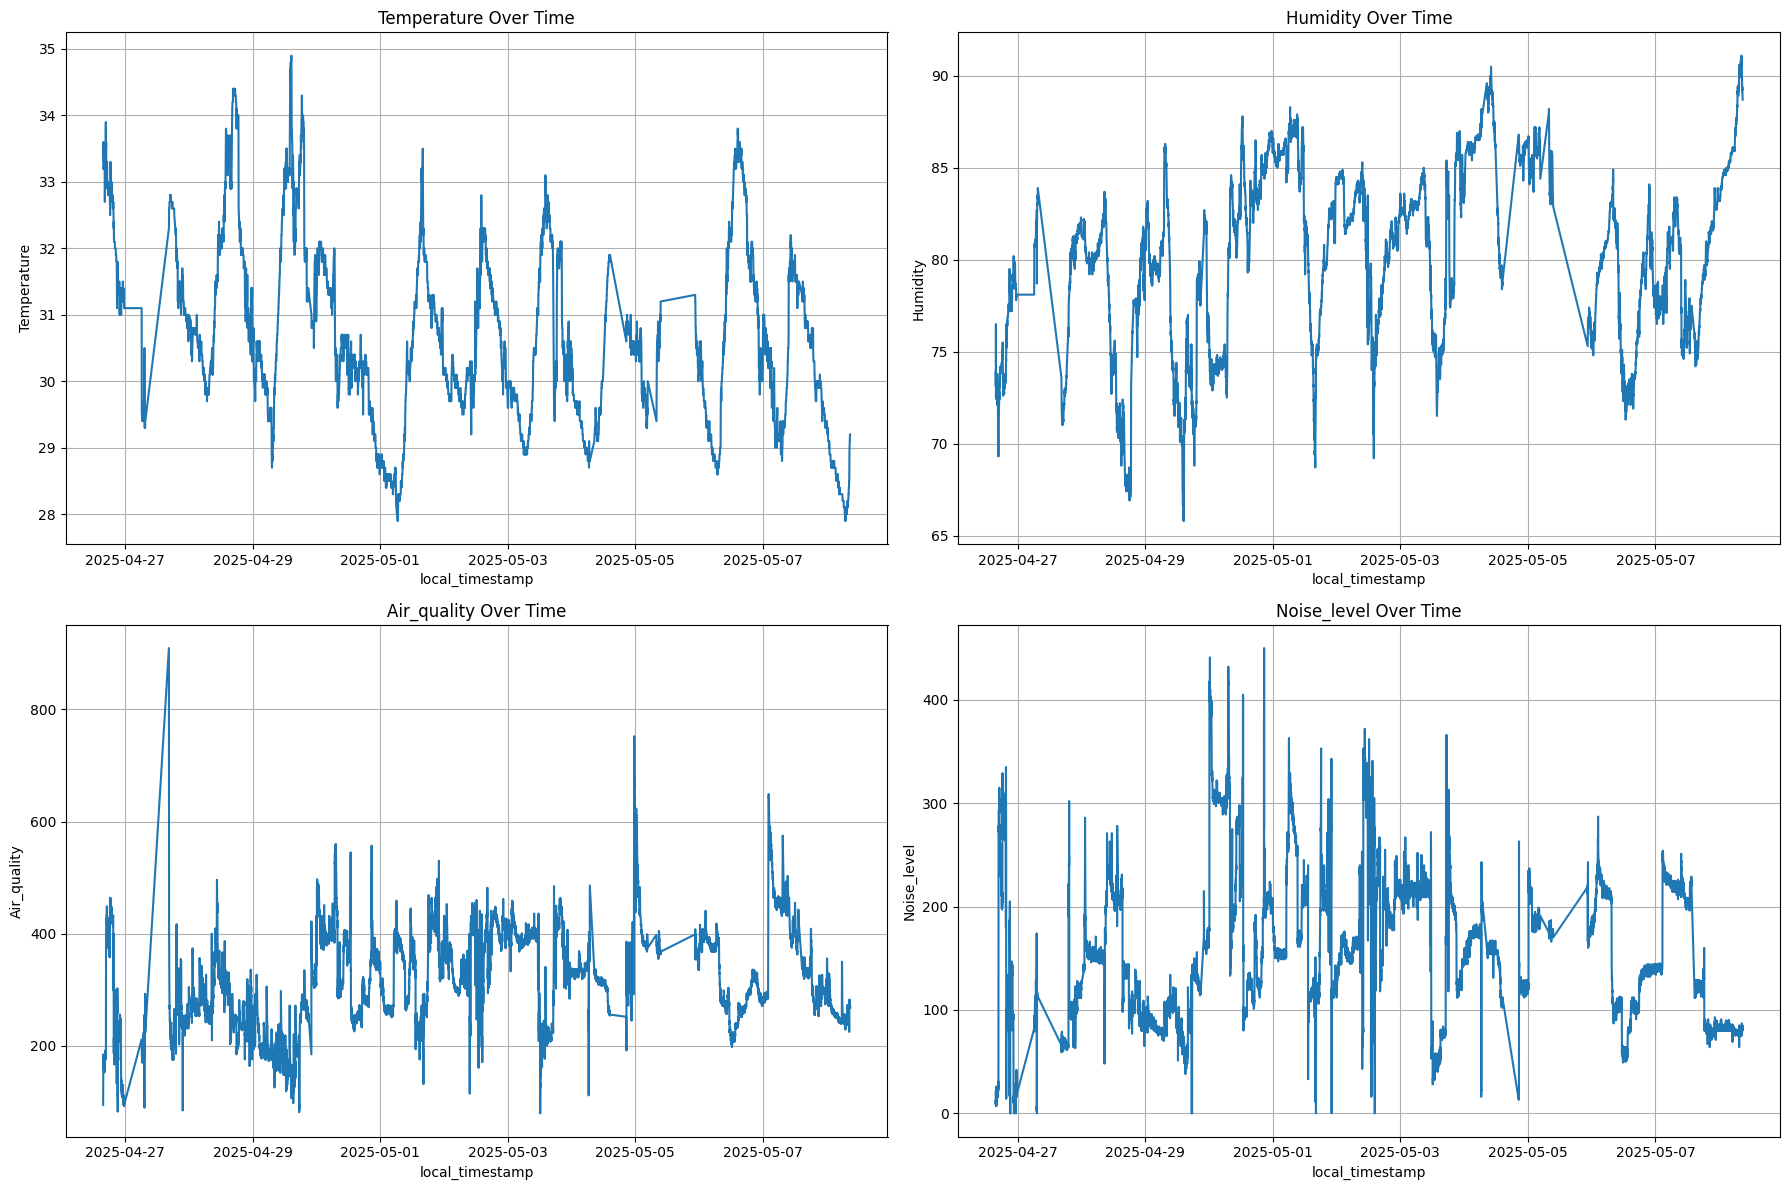

 Temporal Pattern Analysis Done!


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Plotting
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)
    sns.lineplot(data=df, x=df.index, y=feature)
    plt.title(f"{feature.capitalize()} Over Time")
    plt.xlabel('local_timestamp')
    plt.ylabel(feature.capitalize())
    plt.grid(True)

plt.tight_layout()
plt.show()

print(" Temporal Pattern Analysis Done!")



🔗 Correlation Matrix:
             temperature  humidity  air_quality  noise_level
temperature     1.000000 -0.872157    -0.273047    -0.200870
humidity       -0.872157  1.000000     0.248000     0.117054
air_quality    -0.273047  0.248000     1.000000     0.785146
noise_level    -0.200870  0.117054     0.785146     1.000000


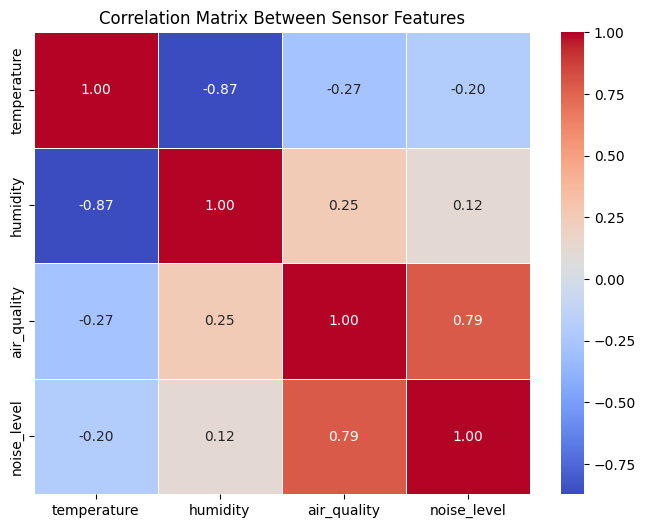

 Correlation Analysis Done!


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns
numeric_cols = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Calculate Correlation Matrix
correlation_matrix = df[numeric_cols].corr()

# Print Correlation Matrix
print("\n🔗 Correlation Matrix:")
print(correlation_matrix)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Sensor Features')
plt.show()

print(" Correlation Analysis Done!")


 Detecting anomalies for temperature...
 Detecting anomalies for humidity...
 Detecting anomalies for air_quality...
 Detecting anomalies for noise_level...


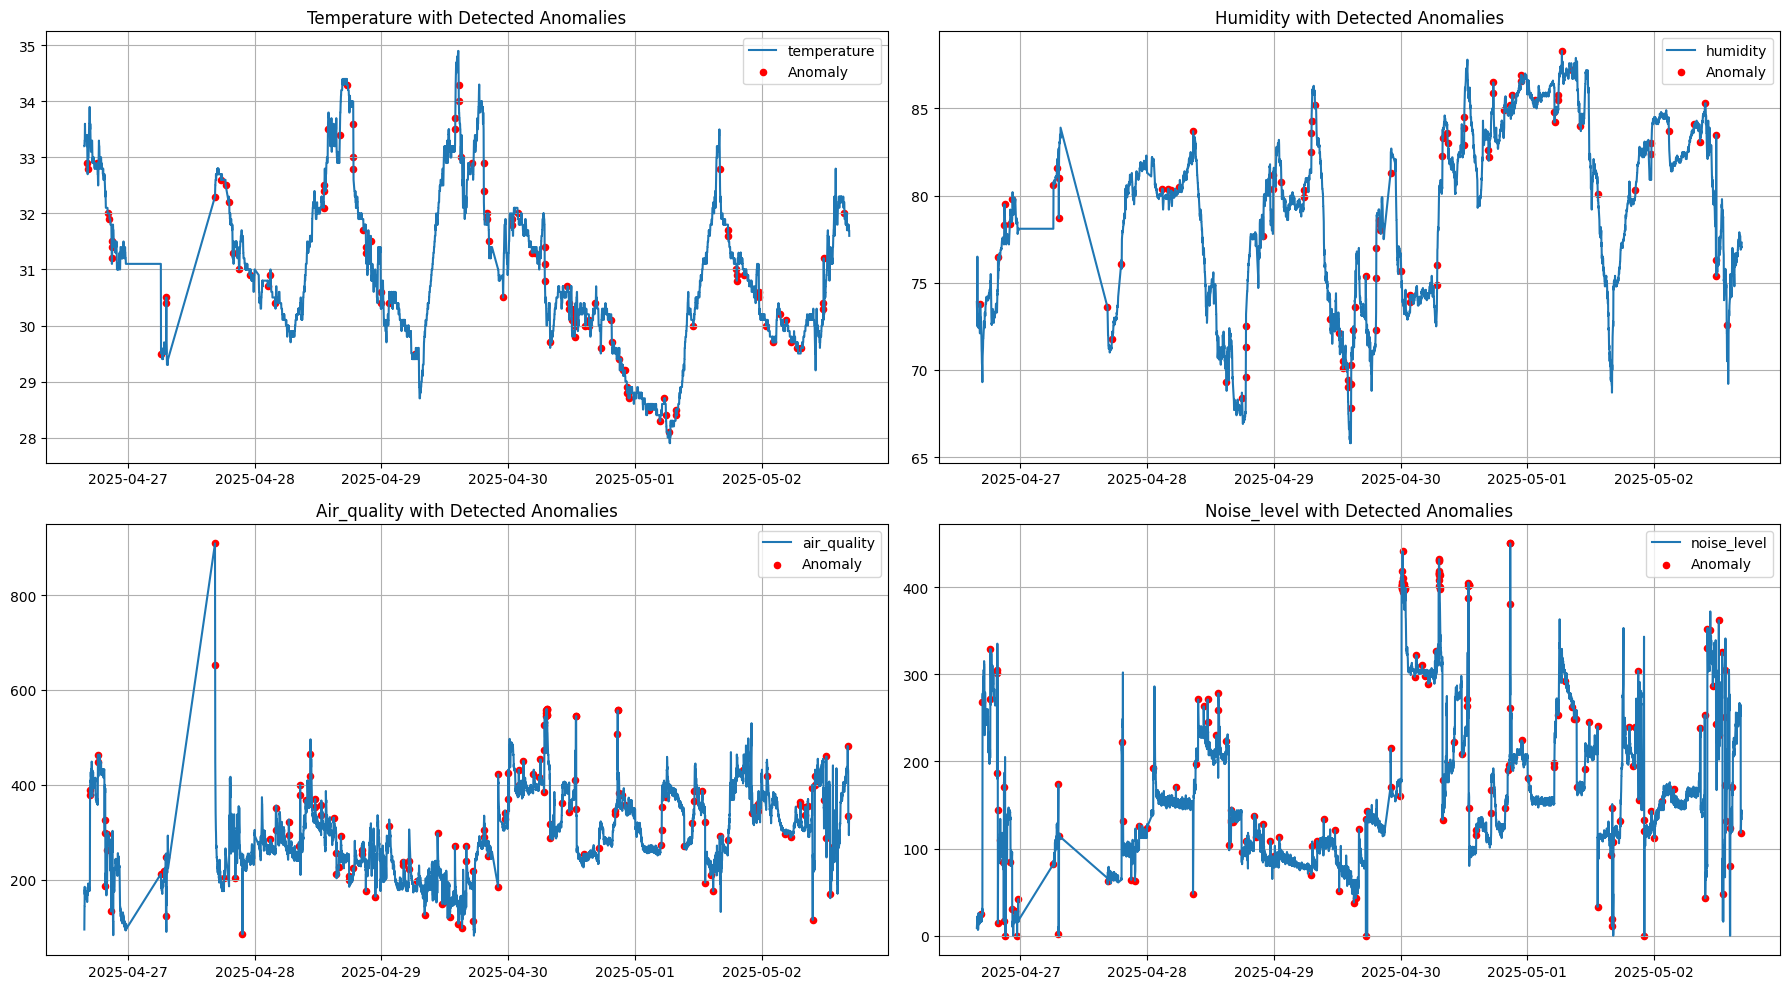

 Anomaly Detection Completed!
 Total anomalies detected (any sensor): 429

 Anomaly Counts per Sensor:
        Sensor  Anomaly_Count
0  temperature            110
1     humidity             93
2  air_quality            147
3  noise_level            193

 Min/Max Values of Anomalies:
            Metric  Value
0  temperature_min   28.1
1     humidity_min   66.3
2  air_quality_min   85.0
3  noise_level_min    0.0
4  temperature_max   34.9
5     humidity_max   88.3
6  air_quality_max  909.0
7  noise_level_max  450.0

 Top 5 Critical Air Quality Spikes:
                                  temperature  humidity  air_quality  \
local_timestamp                                                        
2025-04-27 16:29:20.157000+00:00         32.3      73.6          909   
2025-04-27 16:30:21.596000+00:00         32.4      73.3          652   
2025-04-30 07:17:14.965000+00:00         30.0      80.3          560   
2025-04-30 07:18:16.193000+00:00         30.0      80.4          559   
2025-04-30 07

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 0: Load and clean data ---
df = pd.read_csv('sensor data updated.csv')

# Parse timestamp column to datetime
df['local_timestamp'] = pd.to_datetime(df['local_timestamp'], errors='coerce')

# Drop rows where parsing failed
df = df.dropna(subset=['local_timestamp'])

# Select relevant columns
df = df[['local_timestamp', 'temperature', 'humidity', 'air_quality', 'noise_level']]
df = df.dropna()

# Sort by timestamp and set index
df = df.sort_values(by='local_timestamp')
df.set_index('local_timestamp', inplace=True)

# --- Step 1: Z-Score Based Detection ---
def detect_anomalies_zscore(df, feature, threshold=3):
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    z_scores = (df[feature] - mean_val) / std_val
    return np.abs(z_scores) > threshold

# --- Step 2: Moving Average Based Detection ---
def detect_anomalies_moving_avg(df, feature, window=20, threshold=3):
    rolling_mean = df[feature].rolling(window=window).mean()
    rolling_std = df[feature].rolling(window=window).std()
    upper_bound = rolling_mean + threshold * rolling_std
    lower_bound = rolling_mean - threshold * rolling_std
    return (df[feature] > upper_bound) | (df[feature] < lower_bound)

# --- Step 3: Sudden Jump Detection (NEW) ---
def detect_anomalies_sudden_jump(df, feature, jump_threshold):
    diff = df[feature].diff().abs()
    return diff > jump_threshold

# --- Configuration ---
features = ['temperature', 'humidity', 'air_quality', 'noise_level']
jump_thresholds = {
    'temperature': 5.0,
    'humidity': 7.0,
    'air_quality': 150,
    'noise_level': 100
}
anomaly_results = {}

# --- Step 4: Detect anomalies for each feature using all methods ---
for feature in features:
    print(f" Detecting anomalies for {feature}...")
    anomalies_z = detect_anomalies_zscore(df, feature)
    anomalies_ma = detect_anomalies_moving_avg(df, feature)
    anomalies_jump = detect_anomalies_sudden_jump(df, feature, jump_thresholds[feature])
    
    anomalies_combined = anomalies_z | anomalies_ma | anomalies_jump
    anomaly_results[feature] = anomalies_combined

# --- Step 5: Plot anomalies ---
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.ravel()

for idx, feature in enumerate(features):
    axs[idx].plot(df.index, df[feature], label=feature)
    axs[idx].scatter(df.index[anomaly_results[feature]], df[feature][anomaly_results[feature]],
                     color='red', label='Anomaly', s=20)
    axs[idx].set_title(f"{feature.capitalize()} with Detected Anomalies")
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

# --- Step 6: Save anomalies to CSV ---
anomalies_df = pd.DataFrame({feature+'_anomaly': anomaly_results[feature] for feature in features})
full_anomalies = df.join(anomalies_df)

# Filter rows where any anomaly occurred
anomalies_detected = full_anomalies[
    full_anomalies[[f'{f}_anomaly' for f in features]].any(axis=1)
]
anomalies_detected.to_csv('detected_anomalies.csv')
print(" Anomaly Detection Completed!")
print(f" Total anomalies detected (any sensor): {len(anomalies_detected)}")

# --- Step 7: Anomaly Count per Sensor ---
anomaly_counts = {
    feature: anomaly_results[feature].sum()
    for feature in features
}
anomaly_counts_df = pd.DataFrame(list(anomaly_counts.items()), columns=['Sensor', 'Anomaly_Count'])
anomaly_counts_df.to_csv('anomaly_counts_summary.csv', index=False)
print("\n Anomaly Counts per Sensor:")
print(anomaly_counts_df)

# --- Step 8: Min/Max Values of Anomalies ---
df_anomalies = df[anomaly_results['air_quality'] | anomaly_results['noise_level'] |
                  anomaly_results['temperature'] | anomaly_results['humidity']]

min_max_values = {
    f'{feature}_min': df_anomalies[feature].min()
    for feature in features
}
min_max_values.update({
    f'{feature}_max': df_anomalies[feature].max()
    for feature in features
})
min_max_df = pd.DataFrame(min_max_values.items(), columns=['Metric', 'Value'])
min_max_df.to_csv('anomaly_min_max_summary.csv', index=False)
print("\n Min/Max Values of Anomalies:")
print(min_max_df)

# --- Step 9: Top 5 Critical Air Quality Spikes ---
top5_air_quality = df_anomalies.sort_values(by='air_quality', ascending=False).head(5)
top5_air_quality = top5_air_quality[['temperature', 'humidity', 'air_quality', 'noise_level']]
top5_air_quality.to_csv('top5_air_quality_spikes.csv')
print("\n Top 5 Critical Air Quality Spikes:")
print(top5_air_quality)

print("\n All anomaly summary files saved!")
